##  instaluje biblioteki numpy, matplotlib i Pillow, które są niezbędne do obliczeń numerycznych, wizualizacji danych i obróbki obrazów.

In [6]:
!pip install numpy matplotlib Pillow


### Importowanie Bibliotek

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image, ImageDraw

### ustawiane są parametry dla obliczeń zbioru Mandelbrota, takie jak rozmiar obrazu (size), maksymalna liczba iteracji (no_iter) i próg dla wartości (treshold), które są kluczowe w procesie generowania zbioru.

In [8]:
size=1000
no_iter=30
treshold=2

### funkcja diverge, która oblicza, czy dany punkt należy do zbioru Mandelbrota. Iteruje przez określoną liczbę iteracji, sprawdzając, czy wartość zespolona z 'ucieka do nieskończoności'.

In [9]:
def diverge(c):
    z=0
    no_iter=30
    treshold=80
    for i in range(no_iter):
        z=z**2+c
        if abs(z)>treshold: return 1
    return 0

### diverge_hue, która generuje kolor dla każdego punktu w zbiorze Mandelbrota, w zależności od liczby iteracji potrzebnych do 'ucieczki'.
pomysł na kolorowanie zaczerpnięty z:
https://www.codingame.com/playgrounds/2358/how-to-plot-the-mandelbrot-set/adding-some-colors

In [10]:
def diverge_hue(c):
    z=0
    n=0
    while abs(z) <= treshold and n < no_iter:
        z = z*z + c
        n += 1
    hue=int(255*n/no_iter)
    saturation=255
    value=255 if n<no_iter else 0
    return hue,saturation, value

### mat_bin, która tworzy macierz binarną reprezentującą zbiór Mandelbrota. Dla każdego punktu na siatce oblicza, czy należy on do zbioru, a wyniki zapisuje w macierzy.
### macierz 2-wymiarowa potrzebna dla reprezentacji monochromatycznej


In [11]:

def mat_bin(xmin,xmax,ymin,ymax):
    x = np.linspace(xmin, xmax, size)
    y = np.linspace(ymin, ymax, size)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    flat=Z.flatten()
    result=[diverge(number) for number in flat ]
    matrix=np.array(result).reshape(size,size)
    return matrix

###  mat_hue, która generuje macierz HSV (odcień, nasycenie, wartość) dla każdego punktu zbioru Mandelbrota. Pozwala to na bardziej zaawansowane wizualizacje zbioru.
### macierz 3-wymiarowa dla której każda z warstw odpowiada za wartości H-hue, S- saturation, V- value

In [12]:
def mat_hue(xmin,xmax,ymin,ymax):
    x = np.linspace(xmin, xmax, size)
    y = np.linspace(ymin, ymax, size)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    flat=Z.flatten()
    result_hue=[diverge_hue(number)[0] for number in flat ]
    result_sat=[diverge_hue(number)[1] for number in flat ]
    result_val=[diverge_hue(number)[2] for number in flat ]
    hue_matrix = np.array(result_hue).reshape(size,size)
    sat_matrix = np.array(result_sat).reshape(size,size)
    val_matrix = np.array(result_val).reshape(size,size)
    hsv_matrix = np.zeros((size, size, 3))
    hsv_matrix[:, :, 0] = hue_matrix  # Hue
    hsv_matrix[:, :, 1] = sat_matrix  # Saturation
    hsv_matrix[:, :, 2] = val_matrix  # Value
    return hsv_matrix

 ### konfigurowanie map kolorów i generowanie wizualizacji zbioru Mandelbrota z różnymi zakresami wartości.Dla reprezenetacji czarno

In [13]:
cmap_custom = mcolors.ListedColormap(['white', 'black'])
matrix_overall=mat_bin(-2,1,-2,1)
mat_specific=mat_bin(0,0.5,0,0.5)


### Rysowanie całego zbioru i zapis do pliku.

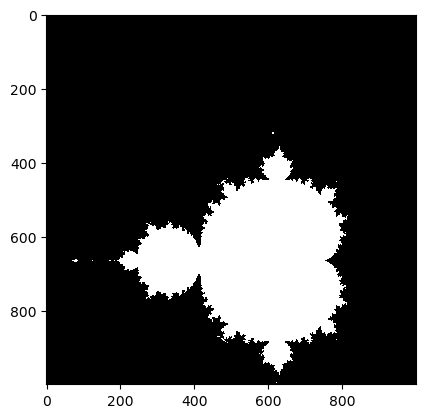

In [14]:
plt.imshow(matrix_overall, cmap=cmap_custom)

plt.imsave('test.png', matrix_overall, cmap=cmap_custom)

### Algorytm sprawdza się też na zbliżeniach poszczególnych części zbioru.

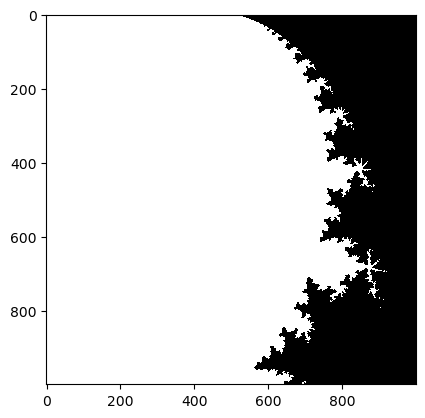

In [15]:
plt.imshow(mat_specific, cmap=cmap_custom)

### generowanie obrazu zbioru Mandelbrota w przestrzeni kolorów HSV, który następnie jest konwertowany do formatu RGB i zapisywany jako plik PNG.



In [16]:
hsv_matrix=mat_hue(-2,2,-2,2)
im = Image.new('HSV', (size, size), (0, 0, 0))
draw = ImageDraw.Draw(im)
for x in range(0, size):
    for y in range(0, size):
        draw.point([x, y], (hsv_matrix[x, y, 0].astype(int), hsv_matrix[x, y, 1].astype(int), hsv_matrix[x, y, 2].astype(int)))
im.convert('RGB').save('output.png', 'PNG')